# **Setup**

In [ ]:
%load_ext autoreload
%autoreload 2

from ngramkit.ngram_train.word2vec import train_models, evaluate_models, plot_evaluation_results
from ngramkit.utilities.notebook_logging import setup_notebook_logging
from ngramkit.ngram_train.word2vec import run_regression_analysis, plot_regression_results

In [ ]:
src_path = '/scratch/edk202/NLP_corpora/Google_Books/20200217/eng/5gram_files'

setup_notebook_logging(
    workflow_name="training_workflow",
    console=False
)

train_models(
    corpus_path=src_path,
    dir_suffix='test',
    years=(1900, 2015),
    year_step=5,
    weight_by=('none',),
    vector_size=(100, 200, 300),
    window=(4,),
    min_count=(1,),
    approach=('skip-gram',),
    epochs=(5, 10, 15, 20, 25, 30),
    max_parallel_models=25,
    workers_per_model=4,
    mode="resume",
    unk_mode="strip",
    use_corpus_file=True
)


Scanning for existing models...


Scanning existing models: 100%|██████████| 278/278 [00:01<00:00, 142.08 files/s]

  Valid models found:    278
  Invalid/partial:       0

WORD2VEC MODEL TRAINING
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Start Time: 2025-11-09 15:20:26

Configuration
════════════════════════════════════════════════════════════════════════════════════════════════════
Database:             .../edk202/NLP_corpora/Google_Books/20200217/eng/5gram_files/5grams_pivoted.db
Model directory:      /scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/models_test
Log directory:        .../edk202/NLP_models/Google_Books/20200217/eng/5gram_files/logs_test/training
Parallel models:      25

Training Parameters
────────────────────────────────────────────────────────────────────────────────────────────────────
Years:                1900–2015 (step=5, 24 years)
Weighting:            ('none',)
Vector size:          (100, 200, 300)
Context window:       (4,)
Minimum word count:   (1,)
Approach:             ('skip-gram',)
Training e

  Created corpus file for year 1975, weight_by=none: /state/partition1/job-397217/w2v_corpus_y1975_wbnone_9gnl6u03.txt
  Created corpus file for year 1970, weight_by=none: /state/partition1/job-397217/w2v_corpus_y1970_wbnone_fr2d9dgh.txt
  Created corpus file for year 1980, weight_by=none: /state/partition1/job-397217/w2v_corpus_y1980_wbnone_dzz0on5m.txt
  Created corpus file for year 1985, weight_by=none: /state/partition1/job-397217/w2v_corpus_y1985_wbnone__180v_w8.txt
  Created corpus file for year 1990, weight_by=none: /state/partition1/job-397217/w2v_corpus_y1990_wbnone_sgai7i2g.txt
  Created corpus file for year 2015, weight_by=none: /state/partition1/job-397217/w2v_corpus_y2015_wbnone_7uxzow0b.txt
  Created corpus file for year 1995, weight_by=none: /state/partition1/job-397217/w2v_corpus_y1995_wbnone_mdef8cjd.txt
  Created corpus file for year 2000, weight_by=none: /state/partition1/job-397217/w2v_corpus_y2000_wbnone_hnwgnjid.txt
  Created corpus file for year 2010, weight_by=n

Training Models:  37%|███▋      | 57/154 [5:10:54<11:30:22, 427.03s/ models]

In [2]:
mod_path = '/scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files'

setup_notebook_logging(
    workflow_name="evaluation_workflow",
    data_path=mod_path,
    console=False
)

evaluate_models(
    model_dir=mod_path,
    dir_suffix='test',
    eval_dir=mod_path,
    save_mode='overwrite',
    run_similarity=True,
    run_analogy=False
)


WORD2VEC MODEL EVALUATION
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Start Time: 2025-11-09 20:38:29

Configuration
════════════════════════════════════════════════════════════════════════════════════════════════════
Model directory:      /scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/models_test
Evaluation file:      ...LP_models/Google_Books/20200217/eng/5gram_files/evaluation_results_test.csv
Log directory:        ...dk202/NLP_models/Google_Books/20200217/eng/5gram_files/logs_test/evaluation
Save mode:            overwrite

Evaluation Datasets
────────────────────────────────────────────────────────────────────────────────────────────────────
Similarity dataset:   ...miniforge/lib/python3.11/site-packages/gensim/test/test_data/wordsim353.tsv
Analogy dataset:      ...orge/lib/python3.11/site-packages/gensim/test/test_data/questions-words.txt

Found 335 models to evaluate



Evaluating models: 100%|██████████| 335/335 [00:31<00:00, 10.71 models/s]



Evaluation Complete
════════════════════════════════════════════════════════════════════════════════════════════════════
Models evaluated:     335
Results saved to:     ...LP_models/Google_Books/20200217/eng/5gram_files/evaluation_results_test.csv
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━



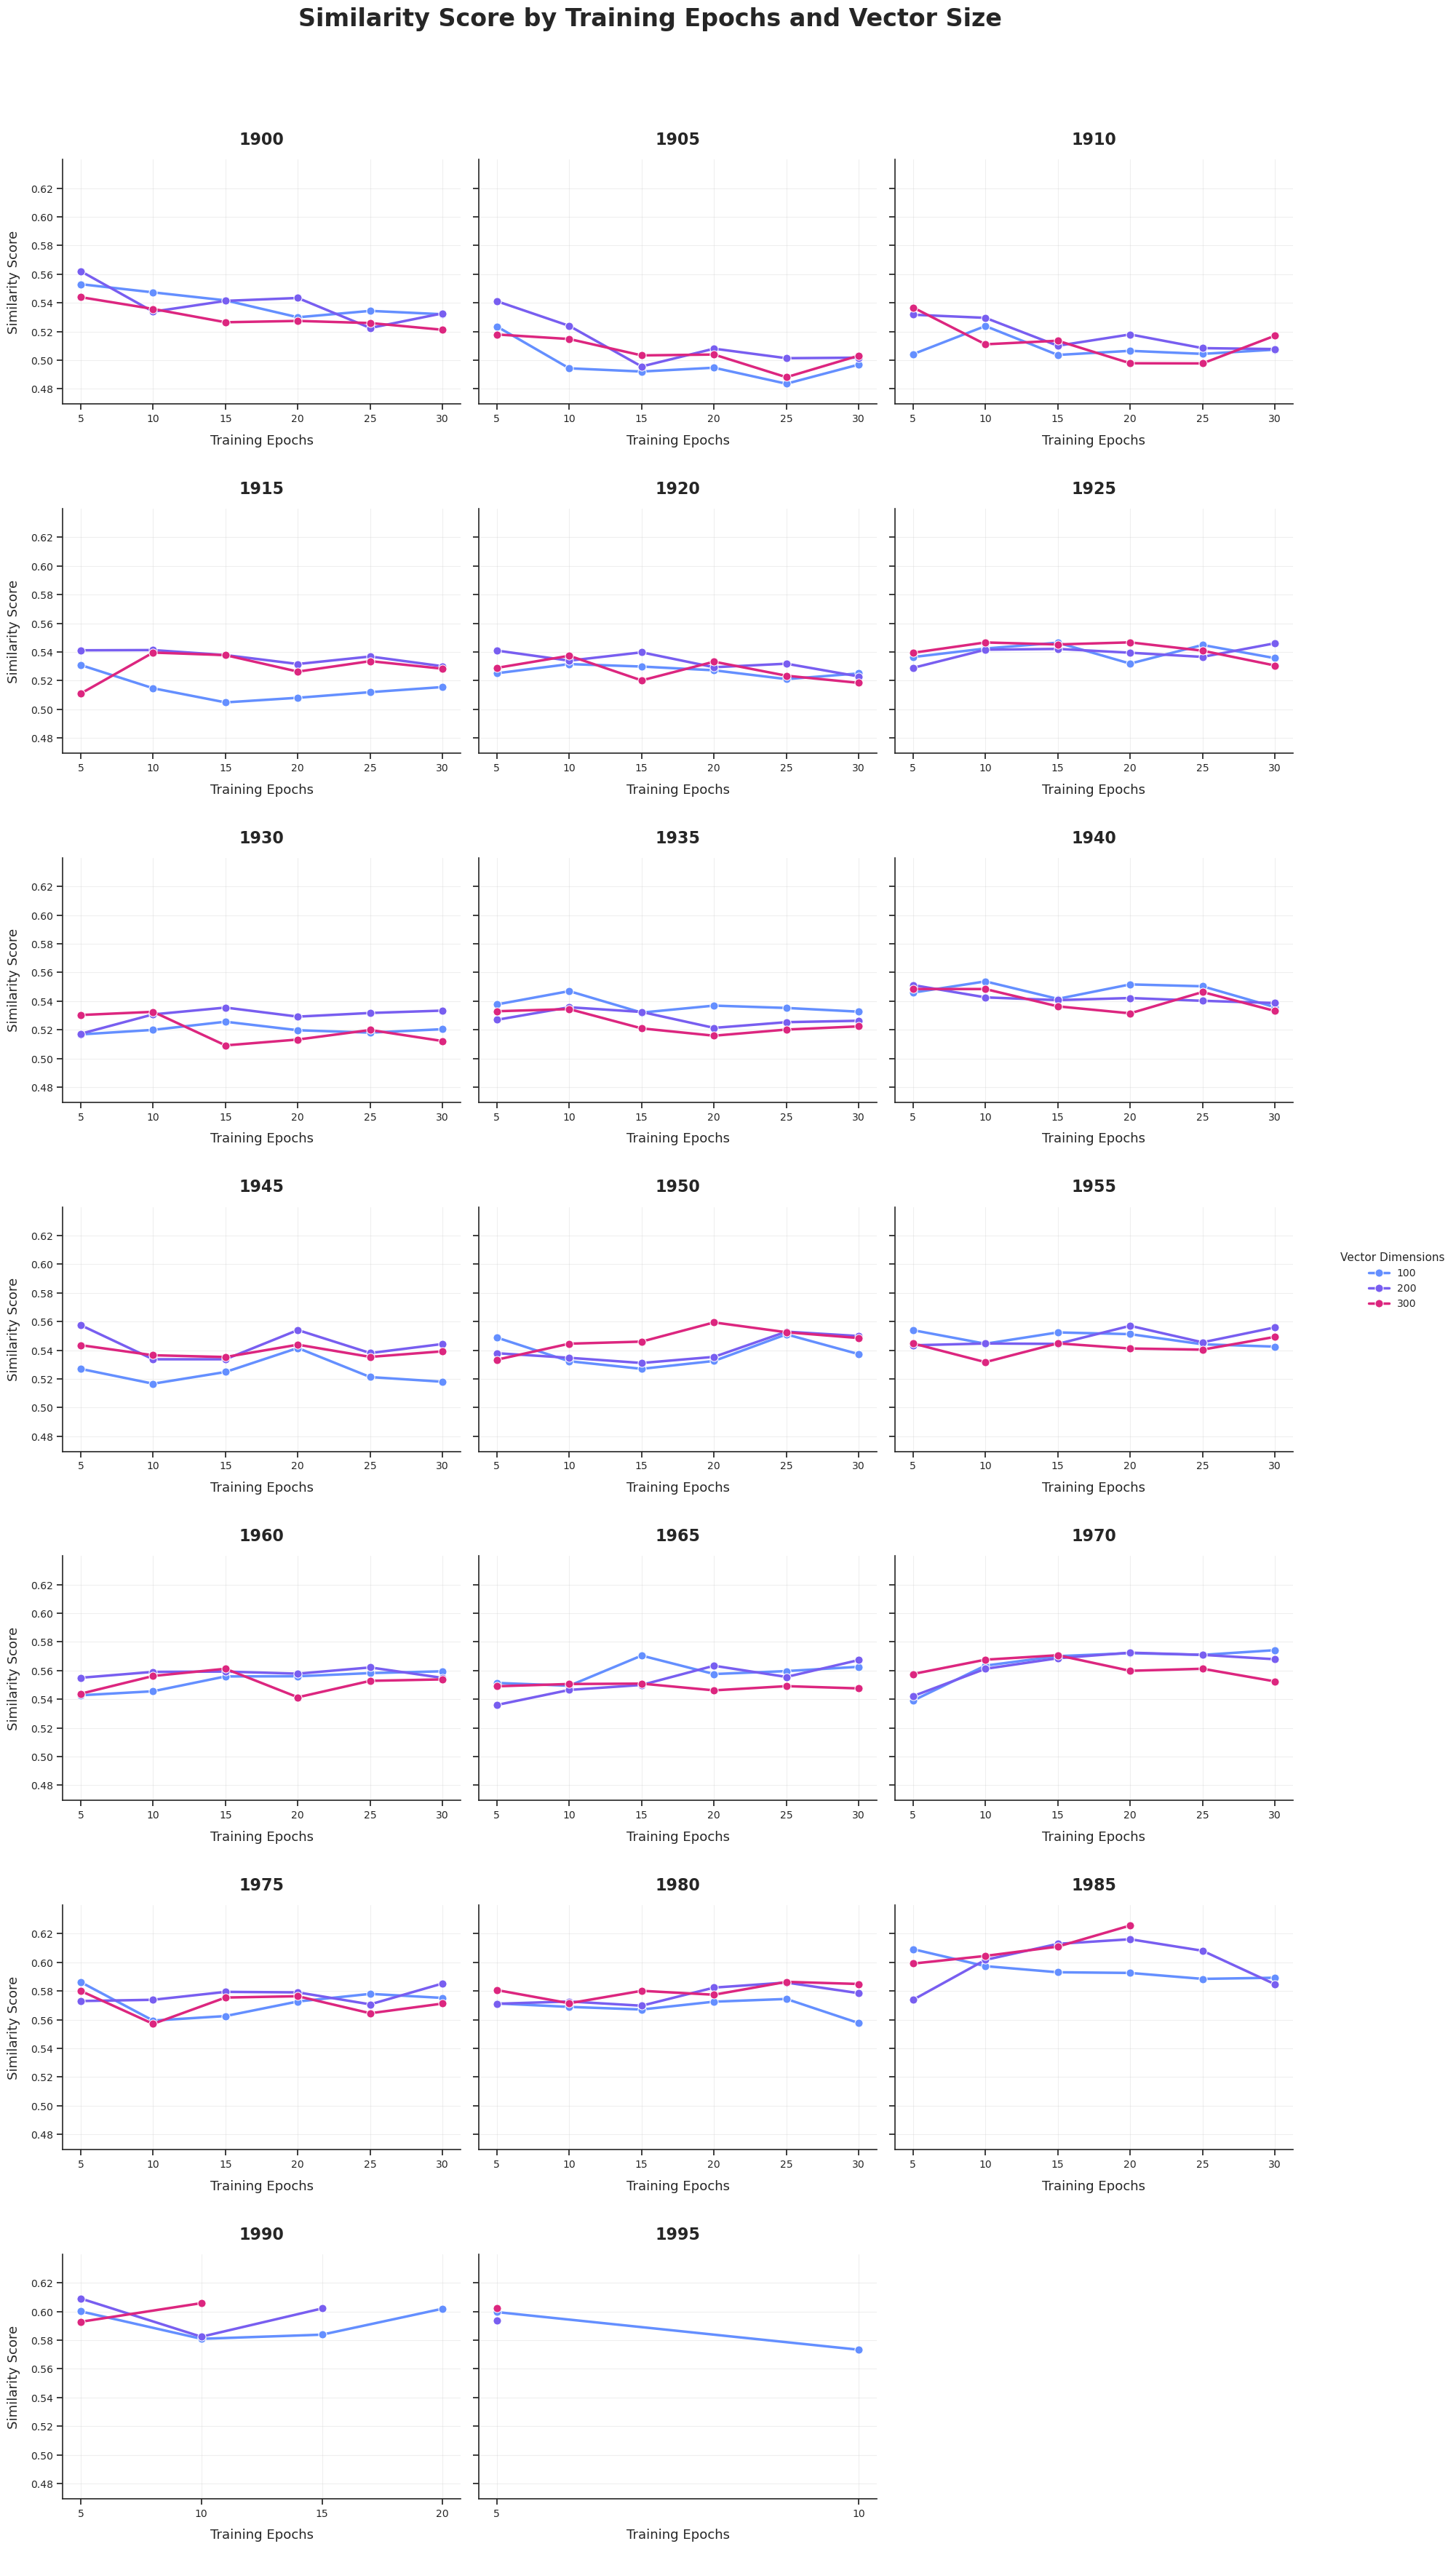

In [3]:
eval_file = '/scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/evaluation_results_test.csv'

plot_evaluation_results(
    csv_file=eval_file,
    verbose=False,
    metric='similarity_score',
    x_vars=['epochs', 'vector_size'],
    panel_by='year',
    plot_type='line',
    plot_title='Similarity Score by Training Epochs and Vector Size'
)

Loading data...
Loaded 335 observations
Number of years: 20

Model specification:
  Formula: similarity_score ~ scale(year) + scale(vector_size) + scale(epochs)
  Random effects: year

Fitting mixed-effects model...
Model converged successfully!

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: similarity_score
No. Observations: 335     Method:             REML            
No. Groups:       20      Scale:              0.0001          
Min. group size:  4       Log-Likelihood:     1032.0560       
Max. group size:  18      Converged:          Yes             
Mean group size:  16.8                                        
--------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           0.546    0.002 222.550 0.000  0.541  0.551
scale(year)         0.023    0.002   9.774 0.000  0.018  0.027
scale(vect

/opt/miniforge/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/miniforge/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


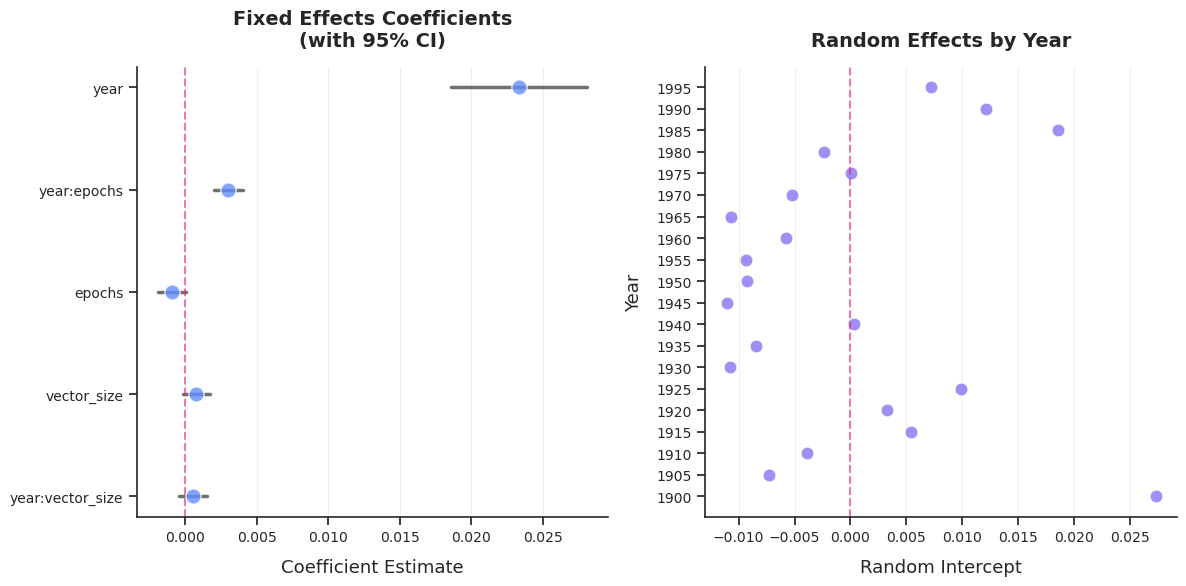

In [4]:
eval_file = '/scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/evaluation_results_test.csv'

import warnings

warnings.filterwarnings('ignore', message='Random effects covariance is singular')

results = run_regression_analysis(
    csv_file=eval_file,
    model_type="auto",
    outcome='similarity_score',
    predictors=['year', 'vector_size', 'epochs']
)

results = run_regression_analysis(
    csv_file=eval_file,
    model_type="auto",
    outcome='similarity_score',
    predictors=['year', 'vector_size', 'epochs', 'approach'],
    interactions=[('year', 'vector_size'), ('year', 'epochs')],
)

plot_regression_results(results)
